## <p style="background-color:#A7E32E;color:black;font-size:150%;text-align:center;border-radius:10px 10px;height:70px;padding-top: 20px;">ICCS261 - Term Project</p>
<div style="text-align: center">By: Adrian Jay Ang [6380989] for T3/22 </div>

---

# Flight Price Prediction Determining Optimal Timing for Purchasing Plane Tickets

---

### Research question:
> When is the best time to purchase plane tickets for optimal pricing?

---

### Rationale:
> Given how rapidly airline ticket rates change, it can be difficult for travellers to decide when 
to buy their tickets. When planning and scheduling their flights, travellers can save money 
by being aware about the trends and factors that affect ticket pricing. 

---

### Research Design:
> #### Source of Data Collection:
> The dataset used for this project is extracted from the website "Easymytrip" which contains flight travel data between some of India's largest cities. **Shubham Bathwal**, the author of the dataset, used scraiping tools to collect data from the website which includes more than 300,000 datapoints.
> #### Data information:
> The collected data includes airlines, flight codes, source and destination cities, departure and arrival times, number of stops, seat class information, duration of flight, days before flight, and ticket fares.
> #### Targeted Variable:
> The ticket fares is the targeted variable because the goal is to find the optimal timing to purchase flight tickets.
> #### Method of Analysis:
> The statistical algorithm used to train the dataset and predict data is Linear Regression. This will have a predictative model developed that can estimate future ticket prices based on identified patterns from historical data.

In [1]:
# Imported libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr


<div style="text-align: center"> [!] previously submitted EDA Report has been remade completely [!] </div>

---
---
---

# Exploratory Data Analysis

Here, the data is explored and analysed in order to answer the following:
- How much do the ticket prices vary between airline choices?
- Do the ticket prices vary depending on departure and arrival time?
- Do the ticket prices vary depending on number of stops?
- Do the ticket prices vary depending on flight duration?
- Do the ticket prices vary depending on days left between purchase and departure?
- Which variables influence flight pricing the most?


In [2]:
# Load the data
df = pd.read_csv("Easemytrip_Flights.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Remove unnecessary column
df.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
300148    300148
300149    300149
300150    300150
300151    300151
300152    300152
Name: Unnamed: 0, Length: 300153, dtype: int64

In [4]:
# Check for missing values
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
# No missing values, now view the dataset's shape
print("Found {} collected measures with {} observations.".format(df.shape[1],df.shape[0]))

Found 11 collected measures with 300153 observations.


---

#### How much do the ticket prices vary between airline choices?

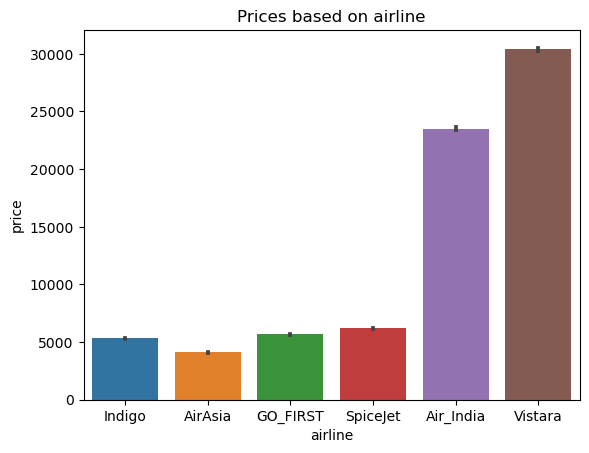

In [6]:
# Let us view the prices using a bar plot
sns.barplot(x='airline', y='price', data=df.sort_values('price')).set_title('Prices based on airline')
plt.show()

Both Vistara and Air India seem to have very expensive prices. Why is that?

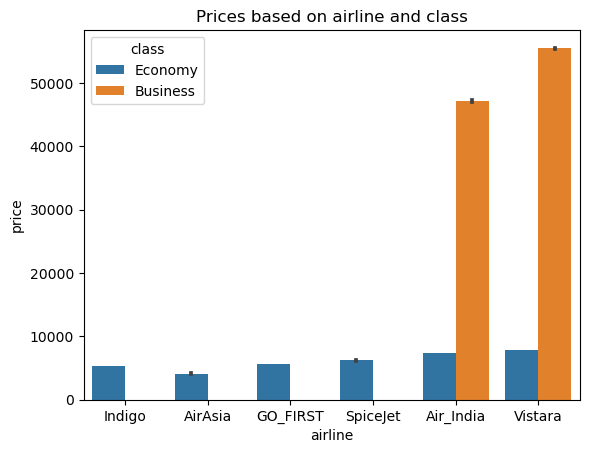

In [7]:
# Because the dataset includes business and economy classes, let us include those
sns.barplot(x='airline', y='price', hue='class', data=df.sort_values('price')).set_title('Prices based on airline and class')
plt.show()

The prices vary greatly because of business class tickets. As only 2 out of the 6 airlines in the dataset contain business class tickets, we can ignore business class tickets for the project. To support this, travellers who are looking to save would not be choosing business class anyways.

In [8]:
# Dropping data under business class...
df = df[df['class'] != 'Business']
df = df.drop(['class'], axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,2.33,1,5955


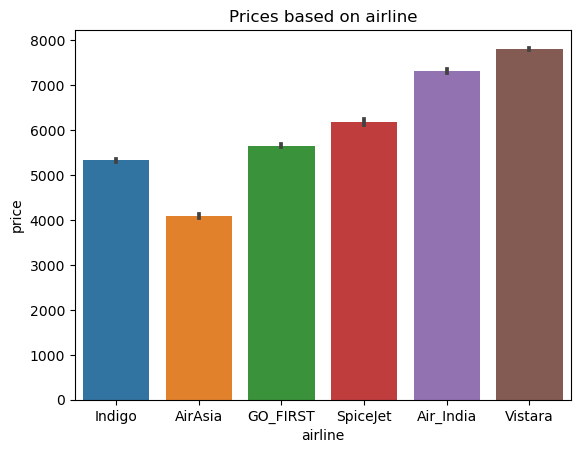

In [9]:
# Now to try again
sns.barplot(x='airline', y='price', data=df.sort_values('price')).set_title('Prices based on airline')
plt.show()

#### The ticket pricing seems to vary slightly based on the airline.

[!] However, travellers may choose a certain airline over the other because of factors such as loyalty programs, seat designs, entertainment, Wi-Fi access, and so on. Accordingly, we should avoid analysing based on the companies but rather focus on factors related to **timing** - which is the mentioned goal of the project.

---

#### Do the ticket prices vary depending on departure and arrival time?

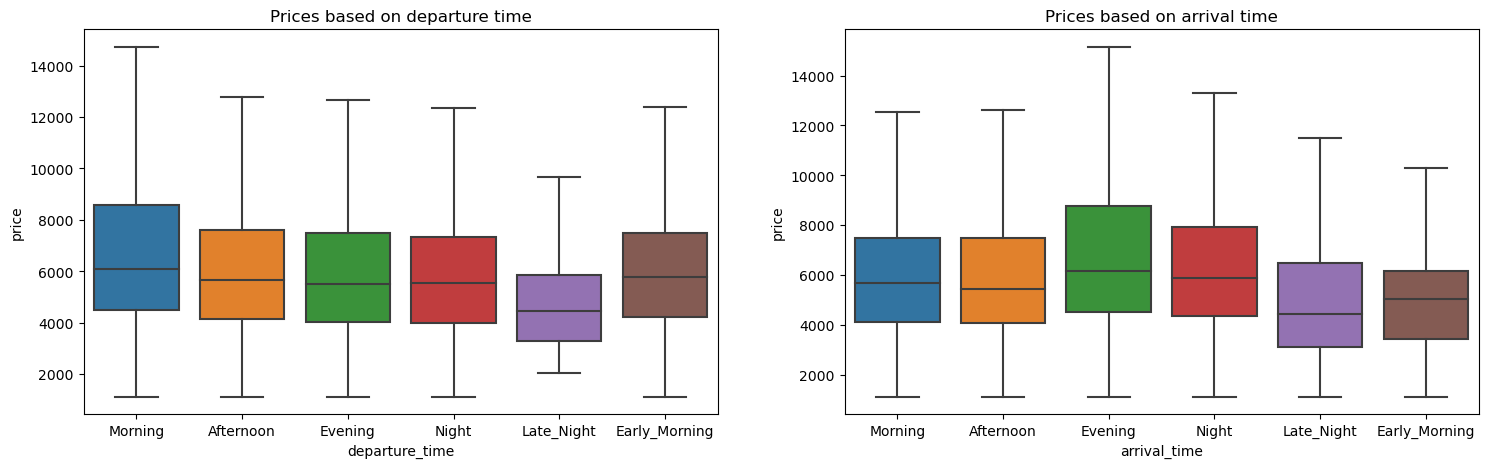

In [10]:
# Let us use 2 box plots 
order = ['Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night', 'Early_Morning']
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
ax1 = sns.boxplot(x='departure_time', y='price', data=df, order=order, showfliers=False)
ax1.set_title('Prices based on departure time')
plt.subplot(1,2,2)
ax2 = sns.boxplot(x='arrival_time', y='price', data=df, order=order, showfliers=False)
ax2.set_title('Prices based on arrival time')
plt.show()

#### The ticket pricing varies based on the departure and arrival time.

For departure times, we can see that **leaving while the sun is not out** can save money, especially **late at night**. 

For arrival times, we can see that **arriving while most people are asleep** is shown to be cheaper compared to other timings.

---

#### Do the ticket prices vary depending on number of stops?

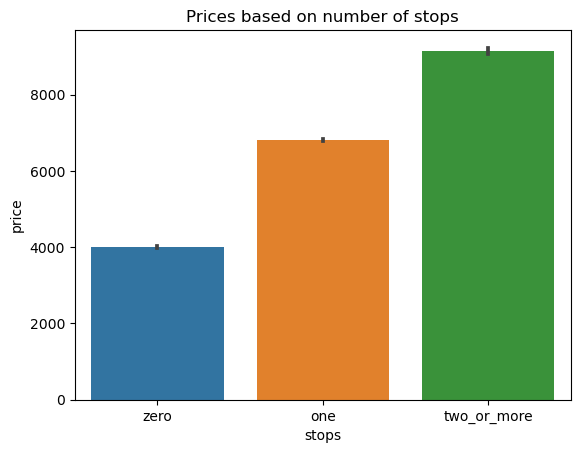

In [11]:
# Let us use a box plot
order = ['zero', 'one', 'two_or_more']
sns.barplot(x='stops', y='price', data=df.sort_values('price'), order=order).set_title('Prices based on number of stops')
plt.show()

#### The ticket pricing varies based on the number of stops.

We can see that **the more stops a flight has, the more expensive the ticket for it is**. We can infer that flights with more stops are longer. But does the flight duration matter? Let us find out on the next question.

---

#### Do the ticket prices vary depending on flight duration?

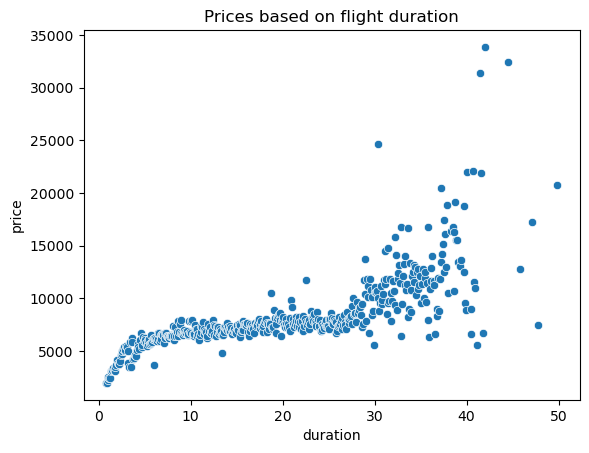

In [12]:
# Let us use a scatter plot
temp = df.groupby(['duration'])['price'].mean().reset_index()
sns.scatterplot(x='duration', y='price', data=temp).set_title('Prices based on flight duration')
plt.show()

#### The ticket pricing varies based on duration time

As shown above, outliers become more evident after the 20 hour duration mark. Even so, the graph shows that **prices increase the longer the flights are**.

---

#### Do the ticket prices vary depending on days left between purchase and departure?

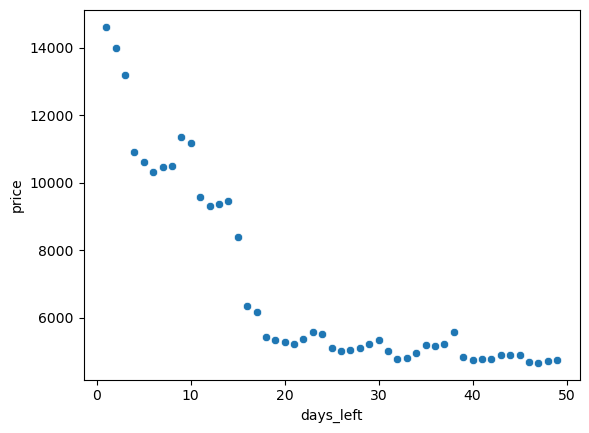

In [13]:
# Let us use another scatter plot
temp = df.groupby(['days_left'])['price'].mean().reset_index()

ax = sns.scatterplot(x='days_left', y='price', data=temp)
plt.show()

#### The ticket pricing varies based on days left before departure

Interestingly, we can see two curves on the graph: The first curve shows a steep decrease in price all the way up to 20 days left. The second curve shows less change but continues the relationship wherein **buying the tickets earlier are usually cheaper compared to buying them later**.

---

#### Which variables influence flight pricing the most?

In [14]:
# Use preprocessing to encode categorical variables
def preprocessing(df):
    # Encode the ordinal variables 'stops'    
    df['stops'] = df['stops'].replace({'zero':0, 'one':1, 'two_or_more':2}).astype(int)
    
    # Create the dummy variables for the times
    dummies_variables = ['departure_time', 'arrival_time']
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    
    # Remove irrelevant data
    df = df.drop(['departure_time', 'arrival_time', 'airline', 'flight', 'source_city', 'destination_city'] ,axis=1)
    return df

# Extract the feature columns and target variable
new_df = preprocessing(df)
X = new_df.drop('price', axis=1)
y = df['price']

# Create a Random Forest regressor and fit the model
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

print(feature_importances)

                         Feature  Importance
2                      days_left    0.596374
1                       duration    0.317850
0                          stops    0.019446
6         departure_time_Morning    0.010710
9           arrival_time_Evening    0.009838
4         departure_time_Evening    0.008522
12            arrival_time_Night    0.007188
11          arrival_time_Morning    0.006945
8     arrival_time_Early_Morning    0.006298
3   departure_time_Early_Morning    0.005963
10       arrival_time_Late_Night    0.005922
7           departure_time_Night    0.004621
5      departure_time_Late_Night    0.000324


#### The number of days left followed by the duration of the flight influence the ticket prices heavily compared to other variables.

From this, we can see that travellers should really plan ahead so they can **buy plane tickets as early as possible to reduce the amount they spend**.

<div style="text-align: center"> [!] previously submitted Regression has been remade completely [!] </div>

---
---
---

# Regression

Here, we will apply linear regression on the given dataset with the top important feature.

<br>

$H_0:$ There is no significant relationship between the number of days left for a flight after purchase and its price.
$H_A:$ There is a significant relationship between the number of days left for a flight after purchase and its price.

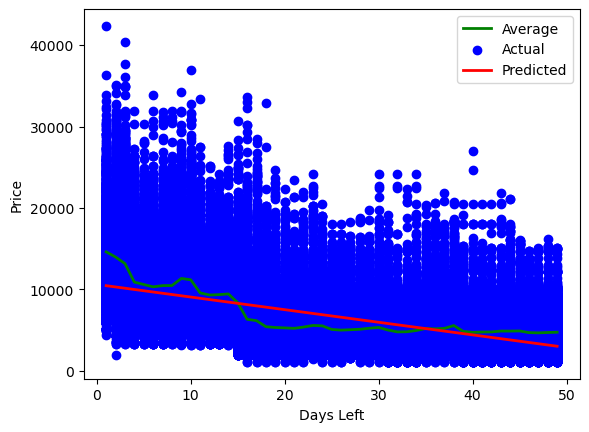

In [15]:
# Extract the feature columns and target variable
new_df = preprocessing(df)
X = new_df[['days_left']]
y = df['price']

# Calculate average price for each unique value of 'days_left'
average_prices = df.groupby('days_left')['price'].mean().reset_index()

# Create a Linear Regression model and fit the data
lr = LinearRegression()
lr.fit(X, y)

# Predict the prices
predicted_prices = lr.predict(X)

# Plot the average line
plt.plot(average_prices['days_left'], average_prices['price'], color='green', linewidth=2, label='Average')

# Plot the prices
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, predicted_prices, color='red', linewidth=2, label='Predicted')

plt.xlabel('Days Left')
plt.ylabel('Price')
plt.legend()
plt.show()


In [16]:
# Calculate the R-squared value
r_squared = lr.score(X, y)
print("R-squared value:", r_squared)

R-squared value: 0.31309782222156235


In [17]:
# Perform Spearman's correlation analysis
correlation, p_value = spearmanr(X, y)

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between days_left and the price of plane tickets.")
else:
    print("Fail to reject the null hypothesis. There is insufficient evidence to suggest a significant relationship between days_left and the price of plane tickets.")


Reject the null hypothesis. There is a significant relationship between days_left and the price of plane tickets.


---
---
---

# End

---

### Results and Discussions
> The linear regression model somehow closely aligns with the average of the actual price values despite the seemingly low `0.31` R-squared value. Moreover, with Spearman's correlation analysis, I was able to reject the null hypothesis. This provides evidence of a significant relationship between the number of days left before the flight and the price of plane tickets. Previously, the `feature_importances` table has already shown the importance of the variable `days_left`. The linear regression supported this even more.
> <br>
> <br>
> Regarding the other findings, flights usually get more expensive the longer they are. This is shown with the analysis on both `duration` and `stops`. Based on data from both `departure_time` and `arrival_time`, travellers are most likely able to save more by departing late at night, and arriving some time from late at night until early in the morning.

### Conclusion
> Considering the results, it is reasonable to conclude that **purchasing tickets in advance, when the number of days left before the flight is higher, is associated with lower ticket prices**. This suggests that planning and booking flights ahead of time may offer cost-saving advantages.
> <br>
> <br>
> However, it is important to note that the model's predictive power (as indicated by the R-squared value) is relatively low, indicating that other factors not captured in the analysis may also influence ticket prices. Thus, while buying tickets in advance may generally be associated with lower prices, there may still be additional factors such as seasonal variations, demand fluctuations, or promotions that can impact ticket pricing which were not included in the dataset.

## <p style="background-color:#A7E32E;color:black;font-size:150%;text-align:center;border-radius:10px 10px;height:70px;padding-top: 20px;">THANK YOU</p>
<div style="text-align: center">By: Adrian Jay Ang [6380989] for T3/22 </div>

---

# Flight Price Prediction Determining Optimal Timing for Purchasing Plane Tickets

---